##### Preparing the data

In [1]:
import pandas as pd

#show all the columns and lines in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Putting AmesHousing.txt data into a dataframe - https://github.com/marcelpinheiro/malum/blob/master/AmesHousing.txt
data = pd.read_csv('AmesHousing.txt', encoding='UTF-8', delimiter='\t')
#Removing meaningless to prediction
data = data.drop(['PID','Order'], axis=1)
#Let´s find out how many null values we have in the dataset
data.isnull().sum().sort_values(ascending=False)
data




,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0

In [2]:
#Here we will try to resolve the null values with two ways: filling all nulls with 0 or with the mean
data = data.fillna(0)

# data_fill_zero = data.fillna(0)
# data_fill_mean = data.fillna(data.mean())

data.isnull().sum().sort_values(ascending=False)
# 

SalePrice          0
Sale Condition     0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Roof Style         0
Year Remod/Add     0
Year Built         0
Utilities          0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Lot Config         0
Overall Cond       0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Heating            0
Heating QC         0
Central Air        0
Screen Porch       0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF

### **Features**

#### Feature selection

##### Correlation

In [3]:
# Correlation: We want to know how much correlated our target column 'SalePrice' is with the features
data_corr = data.corr()
# Let´s keep only features with correlation with SalePrice higher than 0.3
data_corr = data_corr['SalePrice'][data_corr['SalePrice'] > 0.3].abs().sort_values(ascending=False)
data_corr


SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647562
Garage Area       0.640138
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.433147
Wood Deck SF      0.327143
Open Porch SF     0.312951
Name: SalePrice, dtype: float64

In [4]:
#We will use only the columns with the correlation > 0.3
data = data[data_corr.index]
data

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF
0,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,112.0,7,2,639.0,210,62
1,105000,5,896,1.0,730.0,882.0,896,1961,1,1961,0.0,5,0,468.0,140,0
2,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,108.0,6,0,923.0,393,36
3,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,0.0,8,2,1065.0,0,0
4,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998,0.0,6,1,791.0,212,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,2.0,588.0,1003.0,1003,1984,1,1984,0.0,6,0,819.0,120,0
2926,131000,5,902,2.0,484.0,864.0,902,1983,1,1983,0.0,5,0,301.0,164,0
2927,132000,5,970,0.0,0.0,912.0,970,1992,1,1992,0.0,6,0,337.0,80,32
2928,170000,5,1389,2.0,418.0,1389.0,1389,1974,1,1975,0.0,6,1,1071.0,240,38


#### Collinearity 

Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

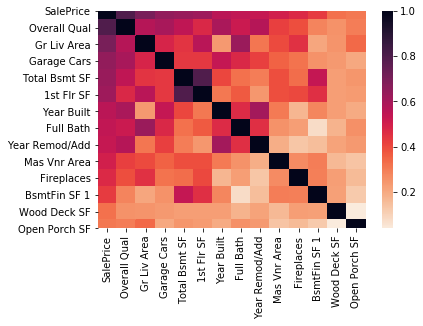

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# corrmat = train_subset[strong_corrs.index].corr()

sns.heatmap(data.corr(), cmap = sns.cm.rocket_r)


In [6]:
# Gr Liv Area and TotRms AbvGrd has high correlation; 
# Garage Area and Garage Cars too. 
# Let´s choose only one of each
data = data.drop(['Garage Area','TotRms AbvGrd'], axis=1)


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)

df_Scale = pd.DataFrame(scaler.transform(data))

columns_good_variance = df_Scale[df_Scale > 0.15]

data = data[:][columns_good_variance.index]

# print('Var Min:', Scale_zero_one.min(), 'Max:', Scale_zero_one.max())

# variance_Remove_Columns = variance[:][variance > 0.015]
# variance_Remove_Columns

# data.var()

KeyError: 'None of [RangeIndex(start=0, stop=2930, step=1)] are in the [columns]'

Como você pode ver, nós temos um dataframe com 2930 linhas x 82 colunas. Mas como o Sklearn não trabalha muito bem com strings, nós temos que converter estas colunas/atributos de texto para números (int) - Veja https://malum.com.br/wp/2019/11/24/normalizando-dados-com-sklearn/


As you can see, we have a dataframe with 2930 rows × 82 columns. But since Sklearn doesn´t work well with strings, we have to convert thoses columns/features that is text to numbers (int) - See https://malum.com.br/wp/2019/11/24/normalizando-dados-com-sklearn/ 



In [7]:

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)

VecValues = vec.fit_transform(data.to_dict(orient='records')) #To work right, we have to convert our dataframe to a dict
VecColNames = vec.get_feature_names()

#Converting the string features/columns into int and put into a dataframe (again)
df = pd.DataFrame(VecValues, columns = VecColNames) 

df

,1st Flr SF,BsmtFin SF 1,Fireplaces,Full Bath,Garage Cars,Gr Liv Area,Mas Vnr Area,Open Porch SF,Overall Qual,SalePrice,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add
0,1656,639,2,1,2,1656,112,62,6,215000,1080,210,1960,1960
1,896,468,0,1,1,896,0,0,5,105000,882,140,1961,1961
2,1329,923,0,1,1,1329,108,36,6,172000,1329,393,1958,1958
3,2110,1065,2,2,2,2110,0,0,7,244000,2110,0,1968,1968
4,928,791,1,2,2,1629,0,34,5,189900,928,212,1997,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003,819,0,1,2,1003,0,0,6,142500,1003,120,1984,1984
2926,902,301,0,1,2,902,0,0,5,131000,864,164,1983,1983
2927,970,337,0,1,0,970,0,32,5,132000,912,80,1992,1992
2928,1389,1071,1,1,2,1389,0,38,5,170000,1389,240,1974,1975


Você pode observar que agora temos muito mais colunas! Mas por que? O DictVectorizer criará uma nova coluna para cada opção de uma coluna. Exemplo: a coluna Utilities possui 3 opções: AllPub, NoSeWa e NoSewr. Então, três colunas foram criadas: 'Utilities = AllPub', 'Utilities = NoSeWa' e 'Utilities = NoSewr'


You can observe that now we have a lot more columns! But Why?
DictVectorizer will create a new column for each option of a column. Example: Utilities column has 3 options: AllPub, NoSeWa and NoSewr. So 3 columns were created: **'Utilities=AllPub', 'Utilities=NoSeWa' and 'Utilities=NoSewr'**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Here we are splitting our data with 2 pieces: train and test. Test will have 33% of data; train will have all the rest
test, train = train_test_split(df,test_size=0.33, random_state=42)


testSalePrice = test['SalePrice']
trainSalePrice = train['SalePrice']

train = train.drop(['SalePrice'], axis=1)
test = test.drop(['SalePrice'], axis=1)

model = LinearRegression()

model.fit(train, trainSalePrice) 

predict = model.predict(test)

predict

array([223373.39308332, 201075.51187626, 155226.17232373, ...,
       189726.83078568, 138231.77894866, 115911.20801721])

Excellent, we have our prediction Sale Prices! But how can we measure how accuracy is this prediction? Using the mean_squared_error from sklearn

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

MSE = mean_squared_error(predict,testSalePrice)
RMSE = np.sqrt(MSE) 
print('MSE:',MSE,'RMSE:',RMSE)

MSE: 1312871587.7262964 RMSE: 36233.569900387905
